# ANALYSIS OF 2022 FBI HATE CRIME DATA

#### - Hate Crime data for the nation are derived from National Incident-Based Reporting System (NIBRS) and Summary Reporting System (SRS) reports voluntarily submitted to the FBI.
#### - The 2022 Hate Crime statistics for the nation are based on data received from 14,660 of 18,888 participating law enforcement agencies in the country that year.
#### - The FBI Uniform Crime Reporting Program defines hate crime as a committed criminal offense which is motivated, in whole or in part, by the offender’s bias(es) against a race, religion, disability, sexual orientation, ethnicity, gender, or gender identity.

# import and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import csv

/var/folders/7y/vhmh51616wg6bkp5k64sq0j40000gn/T/ipykernel_61002/4012551231.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("data/HateCrime_FBIdata.csv")
df.shape
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Bias motivation  34 non-null     object
 1   Type             34 non-null     object
 2   Incidents        34 non-null     int64 
 3   Offenses         34 non-null     int64 
 4   Victims1         34 non-null     int64 
 5   Known offenders  34 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.7+ KB


,Bias motivation,Type,Incidents,Offenses,Victims1,Known offenders
0,Anti-White,Race/Ethnicity/Ancestry,966,1102,1126,892
1,Anti-Black or African American,Race/Ethnicity/Ancestry,3421,4000,4075,3017
2,Anti-American Indian or Alaska Native,Race/Ethnicity/Ancestry,194,209,217,196
3,Anti-Asian,Race/Ethnicity/Ancestry,499,579,602,466
4,Anti-Native Hawaiian or Other Pacific Islander,Race/Ethnicity/Ancestry,26,29,30,23
5,"Anti-Multiple Races, Group",Race/Ethnicity/Ancestry,232,271,287,175
6,Anti-Arab,Race/Ethnicity/Ancestry,92,105,105,82
7,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,738,937,958,778
8,Anti-Other Race/Ethnicity/Ancestry,Race/Ethnicity/Ancestry,399,445,452,351
9,Anti-Jewish,Religion,1122,1194,1217,769


# cleaning up the data

don't really care about the known offenders so I decided to drop that column, but all the rest of the columns are clean and don't need to be changed.

In [3]:
df.columns

Index(['Bias motivation', 'Type', 'Incidents', 'Offenses', 'Victims1',
       'Known offenders'],
      dtype='object')

In [4]:
df = df[['Bias motivation', 'Type', 'Incidents', 'Offenses', 'Victims1']]

# To check the column got dropped:
df.head(10)

,Bias motivation,Type,Incidents,Offenses,Victims1
0,Anti-White,Race/Ethnicity/Ancestry,966,1102,1126
1,Anti-Black or African American,Race/Ethnicity/Ancestry,3421,4000,4075
2,Anti-American Indian or Alaska Native,Race/Ethnicity/Ancestry,194,209,217
3,Anti-Asian,Race/Ethnicity/Ancestry,499,579,602
4,Anti-Native Hawaiian or Other Pacific Islander,Race/Ethnicity/Ancestry,26,29,30
5,"Anti-Multiple Races, Group",Race/Ethnicity/Ancestry,232,271,287
6,Anti-Arab,Race/Ethnicity/Ancestry,92,105,105
7,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,738,937,958
8,Anti-Other Race/Ethnicity/Ancestry,Race/Ethnicity/Ancestry,399,445,452
9,Anti-Jewish,Religion,1122,1194,1217


check for null values

In [5]:
# result --> none are null
df.isna().sum() / df.shape[0]

Bias motivation    0.0
Type               0.0
Incidents          0.0
Offenses           0.0
Victims1           0.0
dtype: float64

# exploratory data analysis

CONTEXT: FBI data about the distribution of bias that movivates various hate crimes

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Race/Ethnicity/Ancestry'),
  Text(1, 0, 'Religion'),
  Text(2, 0, 'Sexual Orientation'),
  Text(3, 0, 'Disability'),
  Text(4, 0, 'Gender'),
  Text(5, 0, 'Gender Identity')])

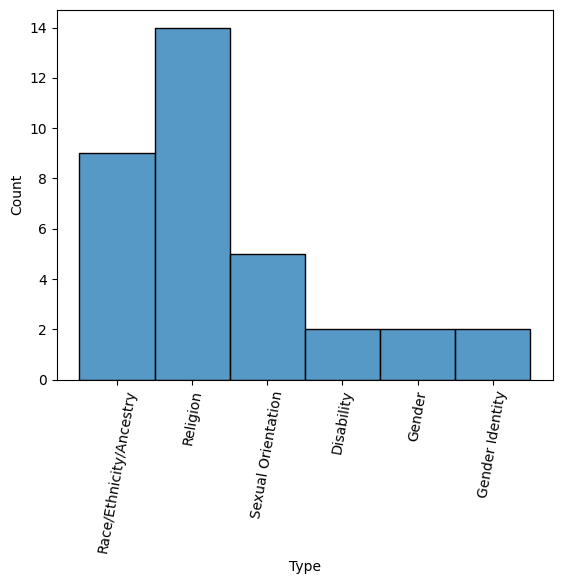

In [6]:
sns.histplot(data = df, x = "Type")
plt.xticks(rotation=80)

# Table shows that there is the most diversity of religious bias motivators

<Figure size 25000x10000 with 0 Axes>

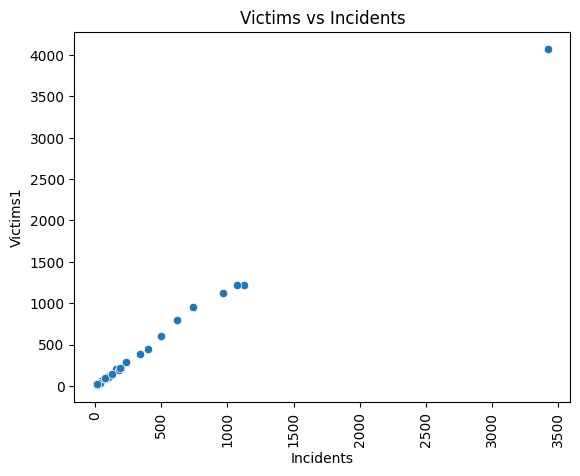

<Figure size 25000x10000 with 0 Axes>

In [7]:
plt.title("Victims vs Incidents")

##### Tried to clean up data to make into a scatter plot --> ended up doing manually ######
# with open('HateCrime_FBIdata.csv', 'r') as file:
#     reader = csv.reader(file)

#     for row in reader:
#         for value in row:
#             if(type(value) == str):
#                 value = value.replace(",", "")
#             value = int(value)

sns.scatterplot(data = df, x = "Incidents", y = "Victims1")
plt.xticks(rotation=90)
plt.figure(figsize=(250,100))

^ Had to clean up the data at this point to keep the proper integer units

# statistical data analysis

### 1. What types of hate crimes are most common?

##### (according to the FBI) an “incident” is defined as one or more offenses committed by the same offender, or group of offenders acting in concert, at the same time and place

In [8]:
sum_victims = df["Victims1"].sum()
print(sum_victims)

sum_incidents = df["Incidents"].sum()
print(sum_incidents)

sum_offenses = df["Offenses"].sum()
print(sum_offenses)

# Incidents are more common than offenses, which makes sense as hate crimes are often group efforts 
# or targeted towards a specific population living in a particular area


13278
11288
12913


### 2. Which type of bias group is mostly targeted?

In [9]:
bias_inc = df.sort_values("Incidents", ascending = False)
bias_inc.head(5)

,Bias motivation,Type,Incidents,Offenses,Victims1
1,Anti-Black or African American,Race/Ethnicity/Ancestry,3421,4000,4075
9,Anti-Jewish,Religion,1122,1194,1217
23,Anti-Gay (Male),Sexual Orientation,1075,1194,1217
0,Anti-White,Race/Ethnicity/Ancestry,966,1102,1126
7,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,738,937,958


In [10]:
bias_off = df.sort_values("Offenses", ascending = False)
bias_off.head(5)

,Bias motivation,Type,Incidents,Offenses,Victims1
1,Anti-Black or African American,Race/Ethnicity/Ancestry,3421,4000,4075
9,Anti-Jewish,Religion,1122,1194,1217
23,Anti-Gay (Male),Sexual Orientation,1075,1194,1217
0,Anti-White,Race/Ethnicity/Ancestry,966,1102,1126
7,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,738,937,958


In [11]:
bias_vic = df.sort_values("Victims1", ascending = False)
bias_vic.head(5)

,Bias motivation,Type,Incidents,Offenses,Victims1
1,Anti-Black or African American,Race/Ethnicity/Ancestry,3421,4000,4075
9,Anti-Jewish,Religion,1122,1194,1217
23,Anti-Gay (Male),Sexual Orientation,1075,1194,1217
0,Anti-White,Race/Ethnicity/Ancestry,966,1102,1126
7,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,738,937,958


From all three types of hate crimes (Incidents, Offenses, Victims) it is clear that the number 1 targeted bias motivation is Anti-Black or African American

### 3. Out of each type/category of bias hate motivation, which one is targeted?

In [12]:
df_race = df.query("Type == 'Race/Ethnicity/Ancestry'")
df_race =  df_race.sort_values("Incidents", ascending = False) 
df_race.head(5)

# Anti-Black (in line with bias group)

,Bias motivation,Type,Incidents,Offenses,Victims1
1,Anti-Black or African American,Race/Ethnicity/Ancestry,3421,4000,4075
0,Anti-White,Race/Ethnicity/Ancestry,966,1102,1126
7,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,738,937,958
3,Anti-Asian,Race/Ethnicity/Ancestry,499,579,602
8,Anti-Other Race/Ethnicity/Ancestry,Race/Ethnicity/Ancestry,399,445,452


In [13]:
df_religion = df.query("Type == 'Religion'")
df_religion =  df_religion.sort_values("Incidents", ascending = False) 
df_religion.head(5)

,Bias motivation,Type,Incidents,Offenses,Victims1
9,Anti-Jewish,Religion,1122,1194,1217
21,Anti-Sikh,Religion,181,192,198
12,Anti-Islamic (Muslim),Religion,158,179,200
10,Anti-Catholic,Religion,107,110,113
18,Anti-Other Christian,Religion,97,111,117


In [14]:
df_sexOT = df.query("Type == 'Sexual Orientation'")
df_sexOT =  df_sexOT.sort_values("Incidents", ascending = False) 
df_sexOT.head(5)

,Bias motivation,Type,Incidents,Offenses,Victims1
23,Anti-Gay (Male),Sexual Orientation,1075,1194,1217
25,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Sexual Orientation,622,745,796
24,Anti-Lesbian,Sexual Orientation,190,211,216
27,Anti-Bisexual,Sexual Orientation,35,37,37
26,Anti-Heterosexual,Sexual Orientation,22,23,23


In [15]:
df_dis = df.query("Type == 'Disability'")
df_dis =  df_dis.sort_values("Incidents", ascending = False) 
df_dis.head(5)

,Bias motivation,Type,Incidents,Offenses,Victims1
29,Anti-Mental,Disability,97,108,111
28,Anti-Physical,Disability,74,83,83


# FUTURE IMPLICATIONS

### What further uses could you see with this data?
##### - Could use it to compare to certain regions in particular
##### - Or could also see a trend in hate crimes over the years (this data is part of larger set)

### Would it be worth training a machine learning model on it? What predictions would you hope to make?
#### - Could use it to predict future hate crimes
#### - I would want to add information about certain regions, which ones are more prevalant in crimes
#### - Then could predict crimes in certain regions to increase surveillance or citizen protection
